## LOADING LIBRARIES

In [1]:
import sqlite3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Connect to SQLite


In [3]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

### Create table


In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

### Insert sample data

In [5]:
sales_data = [
    ("Apple", 10, 5.0),
    ("Banana", 15, 7.5),
    ("Coconut", 8, 12.0),
    ("Dragon fruit", 20, 10.0),
    ("Egg", 5, 4.0),
    ("Fish", 18, 15.0),
    ("Grapes", 12, 6.5),
    ("Hotdog", 25, 8.0),
    ("Icecream", 30, 9.5),
    ("Jelly", 22, 11.0),
    ("Apple", 5, 5.0),
    ("Banana", 10, 7.5),
    ("Coconut", 12, 12.0),
    ("Dragon fruit", 8, 10.0),
    ("Egg", 14, 4.0)
]

In [6]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

### Save changes and close connection

In [7]:
conn.commit()
conn.close()

In [8]:
print("Database updated Successfully!")

Database updated Successfully!


### Connect to SQLite database

In [9]:
conn = sqlite3.connect("sales_data.db")

### SQL query to get total quantity and revenue per product

In [10]:
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

### Load data into pandas DataFrame

In [11]:
df = pd.read_sql_query(query, conn)

### Print results

In [12]:
print("Sales Summary:")
print(df)

Sales Summary:
        product  total_qty  revenue
0         Apple         15     75.0
1        Banana         25    187.5
2       Coconut         20    240.0
3  Dragon fruit         28    280.0
4           Egg         19     76.0
5          Fish         18    270.0
6        Grapes         12     78.0
7        Hotdog         25    200.0
8      Icecream         30    285.0
9         Jelly         22    242.0


### Close connection

In [13]:
conn.close()

### Visualizing using barchart

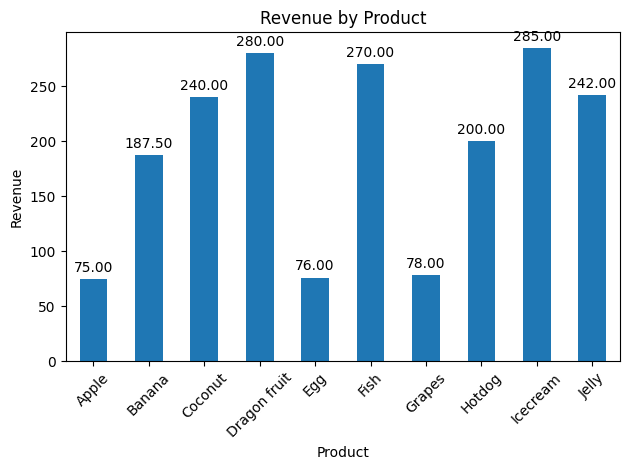

In [29]:
ax = df.plot(kind='bar',x='product',y='revenue',legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Save the chart if needed
plt.savefig("revenue_by_product_barchart.png")

# Show the plot
plt.show()

### Connect to SQLite database

In [20]:
conn = sqlite3.connect("sales_data.db")

### To get total quantity sold per product

In [21]:
query2 = """
SELECT product, SUM(quantity) AS total_qty
FROM sales
GROUP BY product
"""

In [22]:
df2 = pd.read_sql_query(query2, conn)

### Print the data to verify

In [23]:
print("Total Quantity Sold Per Product:")
print(df2)

Total Quantity Sold Per Product:
        product  total_qty
0         Apple         15
1        Banana         25
2       Coconut         20
3  Dragon fruit         28
4           Egg         19
5          Fish         18
6        Grapes         12
7        Hotdog         25
8      Icecream         30
9         Jelly         22


### Close connection

In [24]:
conn.close()

### Visualization using piechart

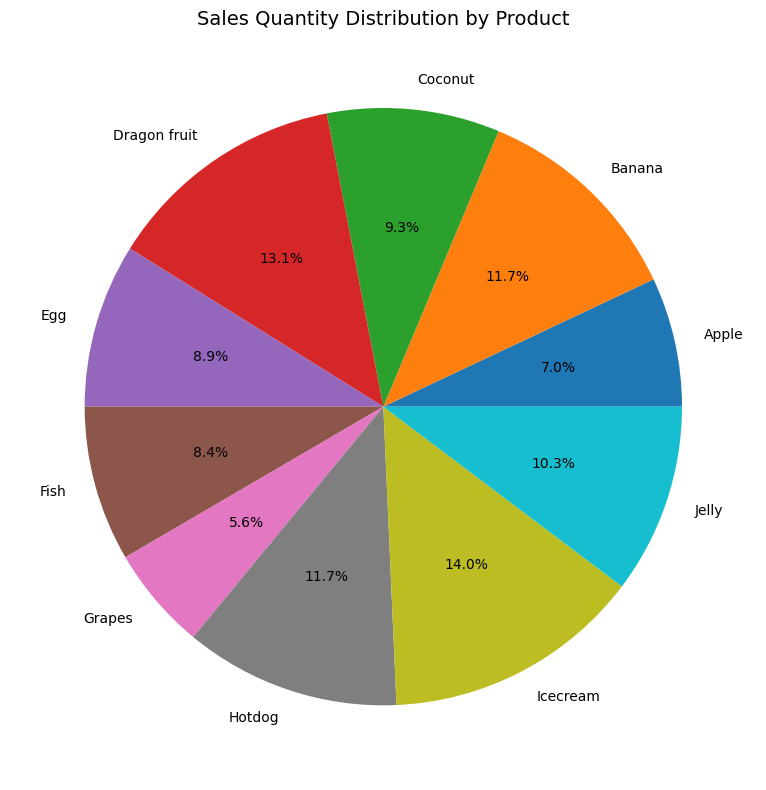

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(df2["total_qty"], labels=df2["product"], autopct="%1.1f%%")
plt.title("Sales Quantity Distribution by Product", fontsize=14)
plt.tight_layout()
# Save the chart if needed
plt.savefig("sold_quantity_per_product_piechart.png")

# Show the plot
plt.show()

# THANK YOU